In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\tonyb\Documents\BOSCOBRAND GIT\GITHUB\Marketing-Customer-Value-Analysis\data\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**CALCULATE ENGAGEMENT RATE**

In [6]:
df['Engaged']=df['Response'].apply(lambda x:0 if x == 'No' else 1)

In [7]:
engagement_rate_df = pd.DataFrame(df.groupby('Engaged').count() ['Response']/df.shape[0]*100)

In [8]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


**SALES CHANNELS**

In [9]:
engagement_by_sales_channel_df=pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len).fillna(0.0)

engagement_by_sales_channel_df.columns=['Not Engaged','Engaged']

In [10]:
engagement_by_sales_channel_df.T

Sales Channel,Agent,Branch,Call Center,Web
Not Engaged,2811,2273,1573,1169
Engaged,666,294,192,156


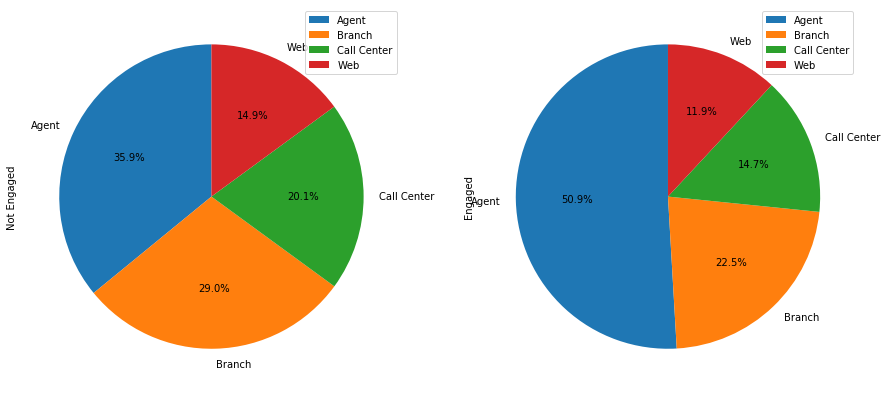

In [11]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()


**TOTAL CLAIM AMOUNTS**

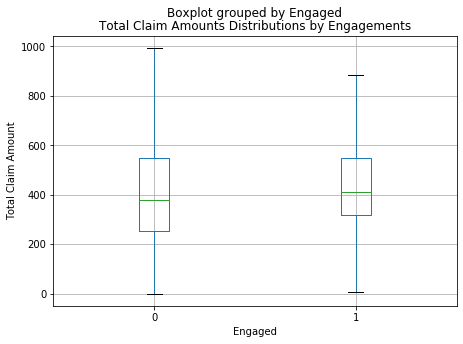

In [12]:
ax = df[['Engaged','Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5),

)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amounts Distributions by Engagements')

plt.show()





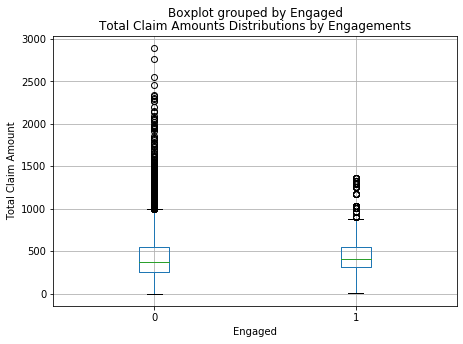

In [13]:
ax = df[['Engaged','Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5),

)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amounts Distributions by Engagements')

plt.show()


In [14]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

In [15]:
continuous_vars

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [16]:
df['Engaged']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [17]:
import statsmodels.api as sm

In [18]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [19]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [20]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

In [21]:
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [22]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                -0.02546
Time:                        17:29:14   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

**CATEGORICAL VARIABLES**

In [23]:
gender_values, gender_labels = df['Gender'].factorize()

In [24]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
gender_labels

Index(['F', 'M'], dtype='object')

In [26]:
categories = pd.Categorical(
    df['Education'],
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [27]:
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [28]:
logit=sm.Logit(
    df['Engaged'],
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [29]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                 -0.2005
Time:                        17:29:14   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

In [30]:
logit = sm.Logit(
    df['Engaged'],
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
       ]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [31]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                -0.02454
Time:                        17:29:14   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""